In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from stage3 import VideoFrameFourGlobes

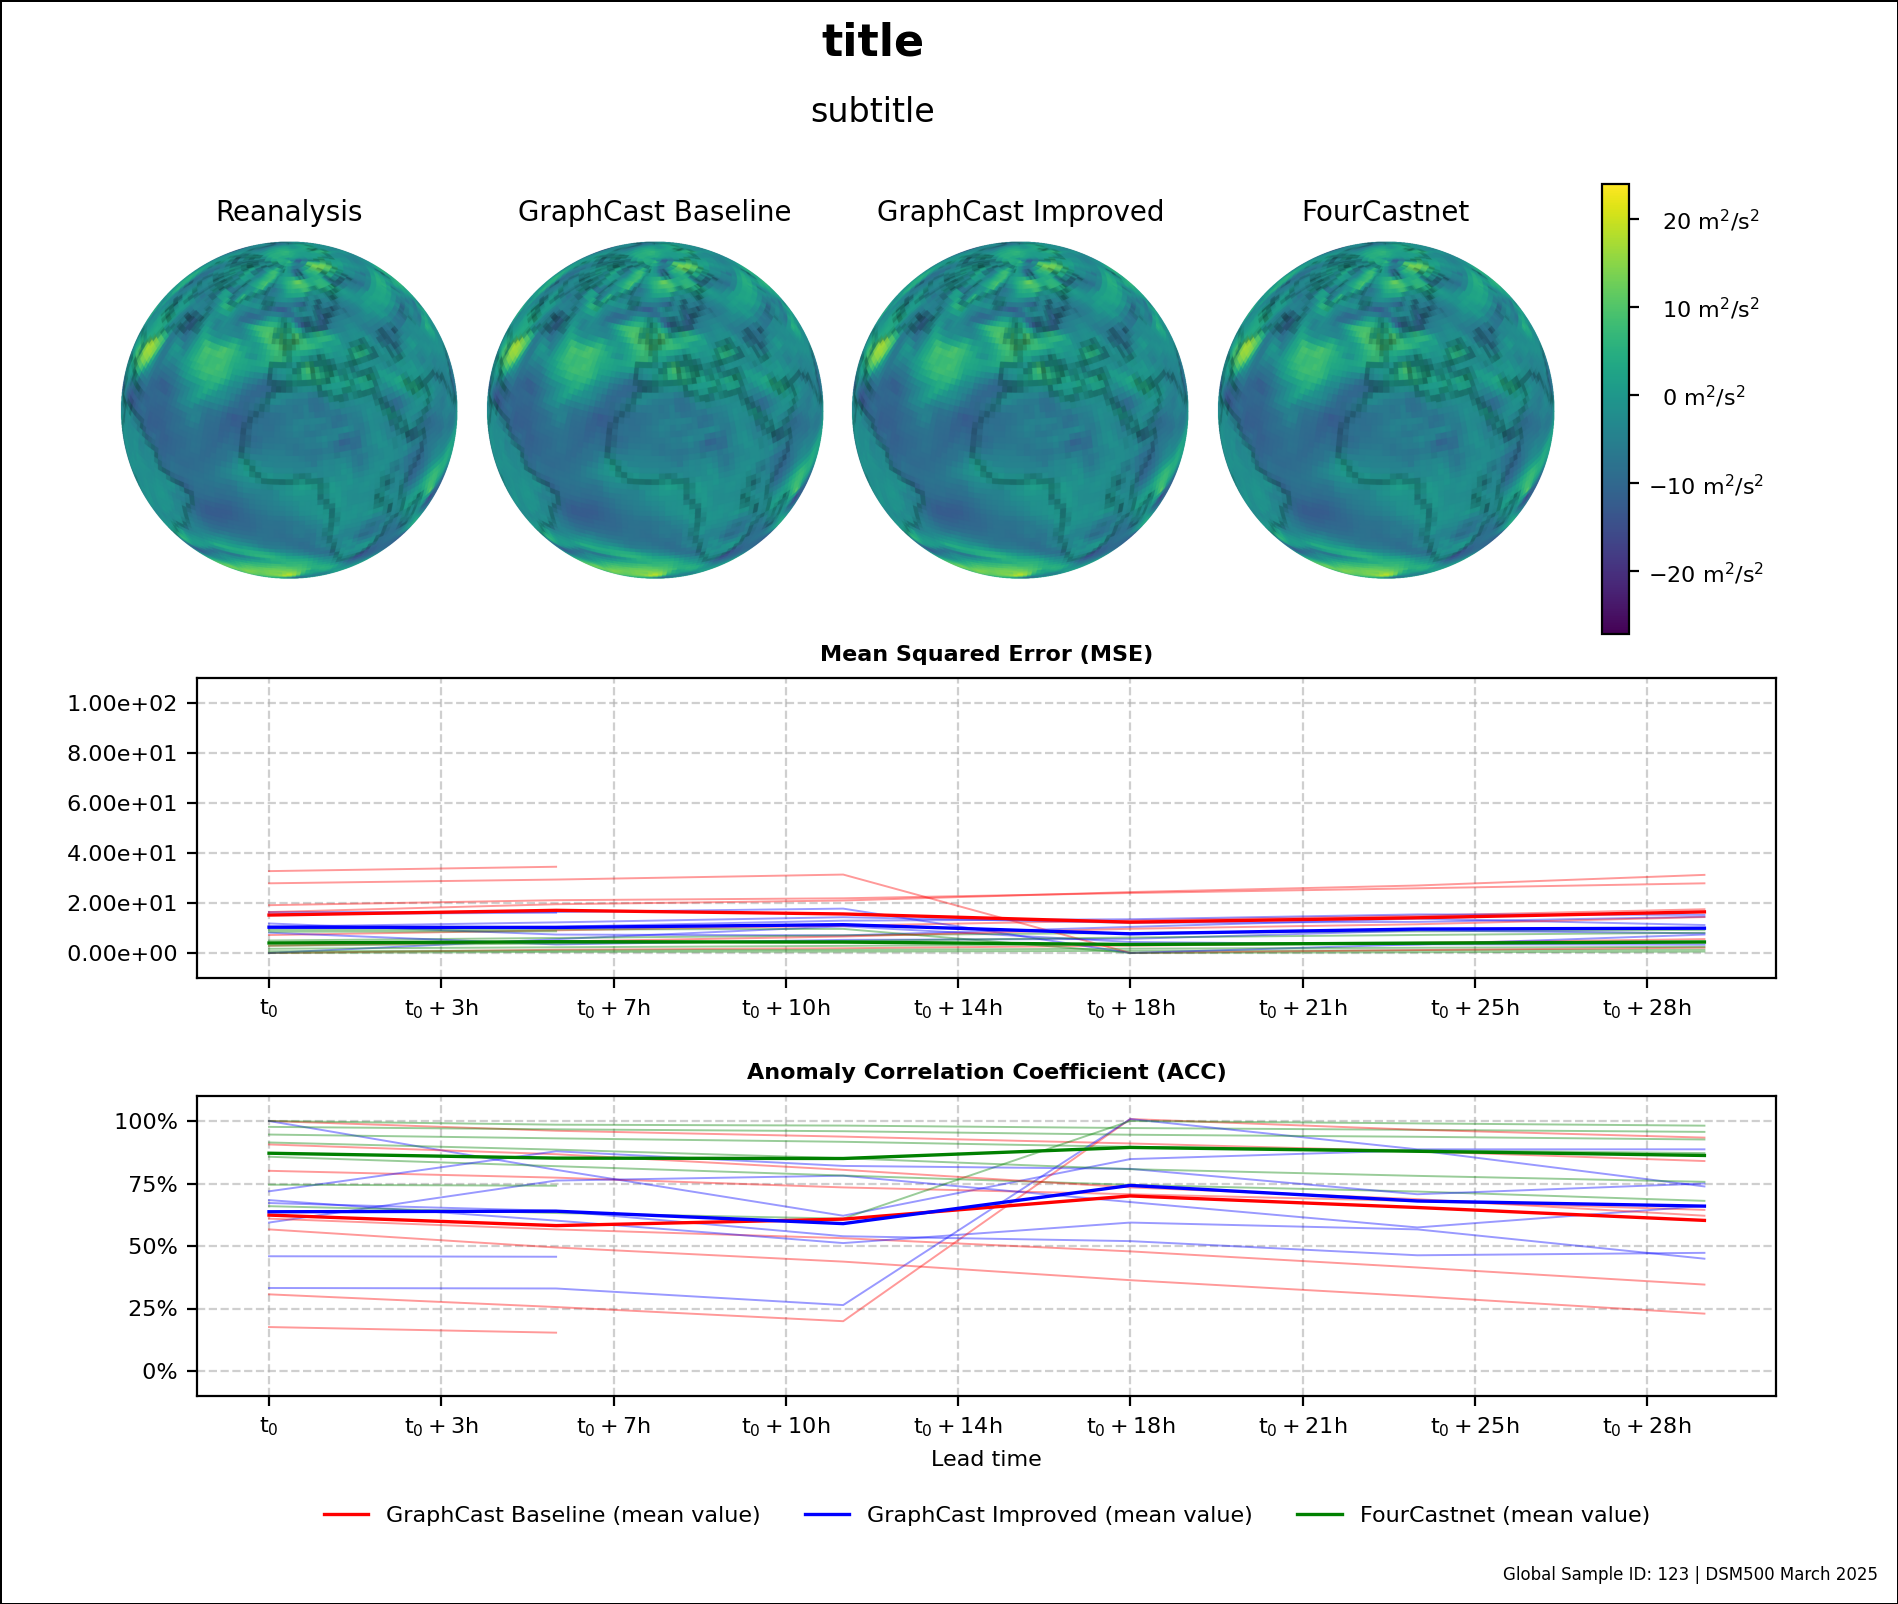

In [261]:
title = "title"
subtitle = "subtitle"
global_sample_id = 123
img_path = "/iopsstor/scratch/cscs/stefschu/DSM500/github/inference/artifacts/images/channel00_sample00_step00_reanalysis.png"


import json
with open("/iopsstor/scratch/cscs/stefschu/DSM500/github/inference/artifacts/plan.json", "r") as f:
    frames = json.load(f)

import h5py
with h5py.File("/iopsstor/scratch/cscs/stefschu/DSM500/github/inference/artifacts/container.h5", "r") as f:
    for activity_i, activity in enumerate(frames):
        if activity["frame_id"] == 37:
            break

samples = 2
rollout_steps = 5

step = 3

x = list(range(rollout_steps+1))
mse_y_gc_baseline = activity["mse"]["gc_baseline"]


VideoFrameFourGlobes()\
    .title(title, subtitle)\
    .footer(f"Global Sample ID: {global_sample_id} | DSM500 March 2025")\
    .img_reanalysis("Reanalysis", img_path)\
    .img_gc_baseline("GraphCast Baseline", img_path)\
    .img_gc_improved("GraphCast Improved", img_path)\
    .img_fcn("FourCastnet", img_path)\
    .cbar(activity["vmin"], activity["vmax"], "{:,.0f} m^2/s^2")\
    .chart_acc(
        rollout_steps=rollout_steps,
        y_gc_baseline=activity["acc"]["gc_baseline"],
        y_gc_improved=activity["acc"]["gc_improved"],
        y_fcn=activity["acc"]["fcn"],
        min=0
    )\
    .chart_mse(
        rollout_steps=rollout_steps,
        y_gc_baseline=activity["mse"]["gc_baseline"],
        y_gc_improved=activity["mse"]["gc_improved"],
        y_fcn=activity["mse"]["fcn"],
        max = 100
    )\
    .show()

